In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import random

In [74]:
hdf = pd.read_csv("/Users/Tata/Downloads/OG/train.csv")
# tdf = pd.read_csv("/Users/Tata/Downloads/house-prices-advanced-regression-techniques/temp_train.csv")
# # hdf = hdf.drop(columns=['LotFrontage','2ndFlrSF','WoodDeckSF','BsmtFinSF1'])
# # hdf.to_csv('/Users/Tata/Downloads/house-prices-advanced-regression-techniques/temp_train.csv', index=False)

In [75]:
# Initialize a list to hold columns to drop
columns_to_drop = []
columns_to_add = pd.DataFrame()

# Loop through each column in the DataFrame
for col in hdf.columns:
    if col == 'SalePrice':  # Assuming 'SalePrice' is the target variable
        continue

    if hdf[col].dtype == 'object':
        # Convert non-numerical columns to dummy variables
        dummies = pd.get_dummies(hdf[col], drop_first=True)
        corr_with_target = dummies.corrwith(hdf['SalePrice']).abs()
        
        # Select dummies with correlation within the specified range
        for dummy_col in dummies.columns:
            if corr_with_target[dummy_col] >= 0.3:
                # Create a new column name by combining original column name with the dummy value
                new_col_name = f"{col} + {dummy_col.split('_')[-1]}"
                hdf[new_col_name] = dummies[dummy_col]
        
        # Drop the original column since it has been processed
        columns_to_drop.append(col)
    else:
        # Calculate correlation directly for numerical columns
        corr_value = hdf[col].corr(hdf['SalePrice'])

        # Check if the correlation value is within the specified range
        if corr_value < 0.2:
            columns_to_drop.append(col)

# Drop columns that don't meet the criteria
hdf = hdf.drop(columns=columns_to_drop)

# Check if there are any remaining categorical columns
remaining_object_cols = hdf.select_dtypes(include=['object']).columns
print("Remaining categorical columns:", remaining_object_cols)

# Display the updated DataFrame
hdf.head()


Remaining categorical columns: Index([], dtype='object')


,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtFinType1 + GLQ,HeatingQC + TA,KitchenQual + Gd,KitchenQual + TA,FireplaceQu + Gd,GarageType + Attchd,GarageType + Detchd,GarageFinish + Unf,SaleType + New,SaleCondition + Partial
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,1,0,1,0,0,1,0,0,0,0
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,0,0,0,1,0,1,0,0,0,0
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,1,0,1,0,0,1,0,0,0,0
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,0,0,1,0,1,0,1,1,0,0
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,1,0,1,0,0,1,0,0,0,0


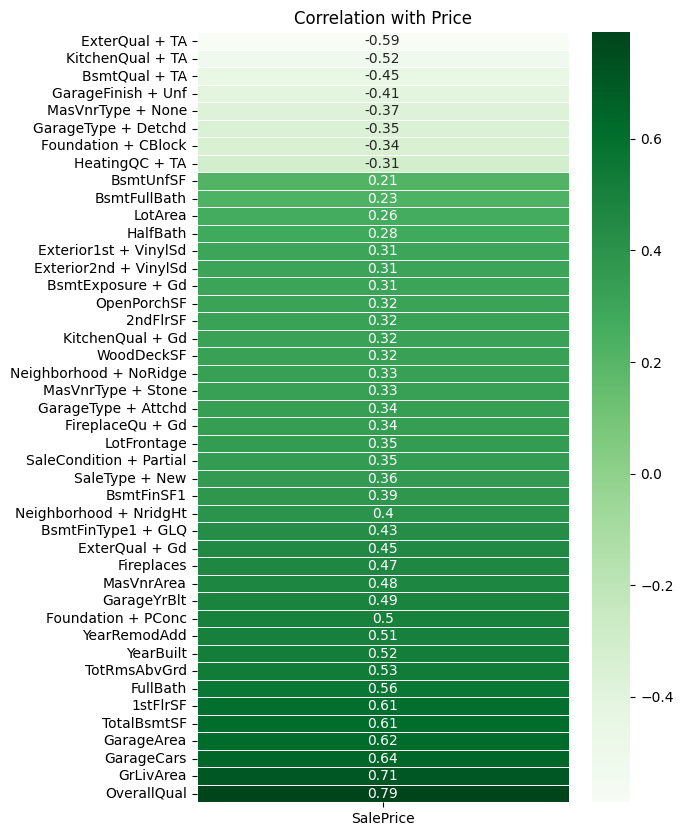

In [77]:


# Assuming 'hdf' is your DataFrame
# Compute the correlation matrix
matrix = hdf.corr()

# Extract the correlation of 'price' with other columns
price_corr = matrix[['SalePrice']].drop('SalePrice').sort_values(by='SalePrice', ascending=True)


# Set up the matplotlib figure
plt.figure(figsize=(6, 10))

# Draw the heatmap
sns.heatmap(price_corr, cmap="Greens", annot=True, annot_kws={"size": 10}, linewidths=.5)

# Show the plot
plt.title('Correlation with Price')
plt.show()

hdf.info()

In [78]:
hdf.info

<bound method DataFrame.info of       LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

      B

In [79]:
# Assuming df is your DataFrame
# df = pd.read_csv('path_to_file.csv')

# Find columns that have at least one missing value
columns_with_nan = hdf.columns[hdf.isnull().any()]

if not columns_with_nan.empty:
    print("Columns with missing values:")
    for column in columns_with_nan:
        # Find rows where the column has a missing value
        rows_with_nan = hdf[hdf[column].isnull()].index.tolist()
        print(f"Column '{column}' has missing values in rows: {rows_with_nan}")
else:
    print("No columns with missing values found.")

Columns with missing values:
Column 'LotFrontage' has missing values in rows: [7, 12, 14, 16, 24, 31, 42, 43, 50, 64, 66, 76, 84, 95, 100, 104, 111, 113, 116, 120, 126, 131, 133, 136, 147, 149, 152, 153, 160, 166, 169, 170, 177, 180, 186, 191, 203, 207, 208, 214, 218, 221, 234, 237, 244, 249, 269, 287, 288, 293, 307, 308, 310, 319, 328, 330, 335, 342, 346, 347, 351, 356, 360, 361, 364, 366, 369, 370, 375, 384, 392, 393, 404, 405, 412, 421, 426, 447, 452, 457, 458, 459, 465, 470, 484, 490, 496, 516, 518, 529, 537, 538, 539, 541, 545, 559, 560, 564, 569, 580, 593, 610, 611, 612, 616, 623, 626, 641, 645, 660, 666, 668, 672, 679, 682, 685, 687, 690, 706, 709, 714, 720, 721, 726, 734, 745, 746, 751, 757, 770, 783, 785, 789, 791, 794, 811, 816, 817, 822, 828, 840, 845, 851, 853, 855, 856, 859, 865, 868, 879, 882, 893, 900, 904, 908, 911, 917, 925, 927, 928, 929, 939, 941, 944, 953, 961, 967, 975, 980, 983, 988, 996, 997, 1003, 1006, 1017, 1018, 1024, 1030, 1032, 1033, 1035, 1037, 1041, 1045,

In [80]:
nan_cols = hdf.columns[hdf.isna().any()].tolist()
print("Columns with NaN values:", nan_cols)

Columns with NaN values: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [151]:

data_to_impute = hdf[nan_cols]
imputer = KNNImputer(n_neighbors=2)

# Perform imputation
imputed_data = imputer.fit_transform(data_to_impute)

# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=nan_cols)

# Update the original DataFrame with the imputed values
hdf[nan_cols] = imputed_df
# return hdf

In [ ]:
hdf = impute_data(hdf)

In [101]:
nan_cols = hdf.columns[hdf.isna().any()].tolist()
print("Columns with NaN values:", nan_cols)
print(hdf.shape)
hdf.to_csv('/Users/Tata/Downloads/house-prices-advanced-regression-techniques/temp_train.csv', index=False)

Columns with NaN values: []
(1460, 45)


In [109]:
#Clean Test Data
tdf = pd.read_csv("/Users/Tata/Downloads/OG/test.csv")

In [117]:
def filter_and_dummy(tdf):
    # Initialize a list to hold columns to drop
    columns_to_drop = []
    columns_to_add = pd.DataFrame()

    # Loop through each column in the DataFrame
    for col in tdf.columns:

        if tdf[col].dtype == 'object':
            # Convert non-numerical columns to dummy variables
            dummies = pd.get_dummies(tdf[col], drop_first=True)
            
            # Select dummies with correlation within the specified range
            for dummy_col in dummies.columns:
                new_col_name = f"{col} + {dummy_col.split('_')[-1]}"
                tdf[new_col_name] = dummies[dummy_col]
            
            # Drop the original column since it has been processed
            columns_to_drop.append(col)

    # Drop columns that don't meet the criteria
    tdf = tdf.drop(columns=columns_to_drop)

    # Check if there are any remaining categorical columns
    remaining_object_cols = tdf.select_dtypes(include=['object']).columns
    print("Remaining categorical columns:", remaining_object_cols)

    # Display the updated DataFrame
    tdf.head()

In [118]:
filter_and_dummy(tdf)

Remaining categorical columns: Index([], dtype='object')


In [111]:

# Get the columns in each DataFrame
columns_df1 = set(hdf.columns)
columns_df2 = set(tdf.columns)

# Find columns that are in df2 but not in df1
columns_in_df2_not_in_df1 = columns_df2 - columns_df1
print("Columns in df2 but not in df1:", len(list(columns_in_df2_not_in_df1)))

tdf.drop(columns=list(columns_in_df2_not_in_df1), axis=1, inplace=True)
print(tdf.shape)

Columns in df2 but not in df1: 184
(1459, 44)


In [112]:
nan_cols = tdf.columns[tdf.isna().any()].tolist()
print(nan_cols)

['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [152]:

data_to_impute = tdf[nan_cols]
imputer = KNNImputer(n_neighbors=2)

# Perform imputation
imputed_data = imputer.fit_transform(data_to_impute)

# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=nan_cols)

# Update the original DataFrame with the imputed values
tdf[nan_cols] = imputed_df

In [115]:
nan_cols = tdf.columns[tdf.isna().any()].tolist()
print(nan_cols)
tdf.to_csv('/Users/Tata/Downloads/house-prices-advanced-regression-techniques/test.csv', index=False)

[]


In [131]:
#Train and Test with No Changes using get dummies
hdf = pd.read_csv("/Users/Tata/Downloads/OG/train.csv")
tdf = pd.read_csv("/Users/Tata/Downloads/OG/test.csv")

In [136]:
def filter_and_drop(tdf):
    # Initialize a list to hold columns to drop
    columns_to_drop = []

    # Loop through each column in the DataFrame
    for col in tdf.columns:
        if tdf[col].dtype == 'object':
            # Append the column to the drop list
            columns_to_drop.append(col)

    # Drop columns that meet the criteria
    tdf = tdf.drop(columns=columns_to_drop)

    # Display the number of columns dropped and remaining
    print(f"Columns dropped: {columns_to_drop}")
    print(f"Number of columns before drop: {len(tdf.columns) + len(columns_to_drop)}")
    print(f"Number of columns after drop: {len(tdf.columns)}")

    # Check if there are any remaining categorical columns
    remaining_object_cols = tdf.select_dtypes(include=['object']).columns
    print("Remaining categorical columns:", remaining_object_cols)

    # Return the modified DataFrame
    return tdf

In [138]:
hdf = filter_and_drop(hdf)
tdf = filter_and_drop(tdf)
print(hdf.shape,tdf.shape)

Columns dropped: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Number of columns before drop: 81
Number of columns after drop: 38
Remaining categorical columns: Index([], dtype='object')
Columns dropped: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',

In [153]:
nan_cols = tdf.columns[tdf.isna().any()].tolist()
print("Columns with NaN values:", nan_cols)
print(tdf.shape)

Columns with NaN values: []
(1459, 37)


In [154]:
hdf.to_csv('/Users/Tata/Downloads/HousePricing/train_data.csv')
tdf.to_csv('/Users/Tata/Downloads/house-prices-advanced-regression-techniques/testy.csv')